
# Gradient Descent for 2-Parameter Linear Regression

We revisit the linear-regression example but now treat both the intercept $w_0$ and slope
$w_1$ as trainable parameters. As before, we derive the gradients analytically and then
perform gradient descent one step at a time to see the model converge.



## Generate training samples

We create noisy points from a straight line in order to have a regression task.


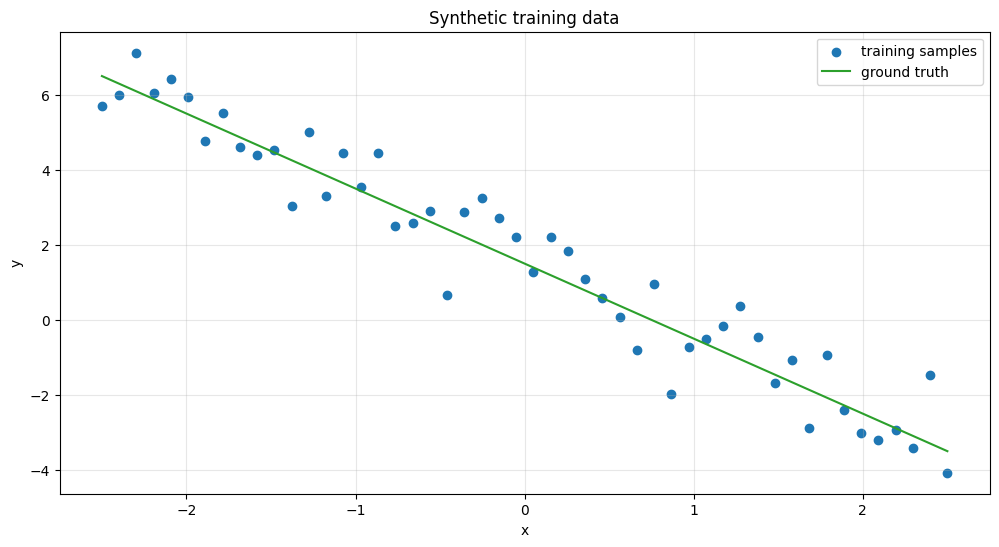

In [1]:

import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(123)

true_w0 = 1.5
true_w1 = -2.0
n_samples = 50

x_train = np.linspace(-2.5, 2.5, n_samples)
noise = rng.normal(scale=0.8, size=n_samples)
y_train = true_w0 + true_w1 * x_train + noise

plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, color='C0', label='training samples')
plt.plot(x_train, true_w0 + true_w1 * x_train, color='C2', label='ground truth')
plt.title('Synthetic training data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



## Understanding the model, loss, and gradient

The linear model predicts

$$f(x; w_0, w_1) = w_0 + w_1 x.$$

For a dataset $(x_i, y_i)$ the mean-squared-error loss is

$$L(w_0, w_1) = \frac{1}{n} \sum_{i=1}^n (w_0 + w_1 x_i - y_i)^2.$$

We need the partial derivatives $\frac{\partial L}{\partial w_0}$ and
$\frac{\partial L}{\partial w_1}$.

### Step 1: Make the dependence explicit
Every summand is $(g_i(w_0, w_1))^2$ with $g_i = w_0 + w_1 x_i - y_i$. The loss can be written as

$$L = \frac{1}{n} \sum_{i=1}^n g_i^2.$$

### Step 2: Apply the chain rule to each term
Using $\frac{\partial}{\partial w}(g^2) = 2 g \frac{\partial g}{\partial w}$ we obtain for each sample

$$\frac{\partial}{\partial w_0} g_i^2 = 2 g_i \frac{\partial g_i}{\partial w_0}, \qquad
  \frac{\partial}{\partial w_1} g_i^2 = 2 g_i \frac{\partial g_i}{\partial w_1}.$$

### Step 3: Differentiate the inner term
Treat $x_i$ and $y_i$ as constants. Then

$$\frac{\partial g_i}{\partial w_0} = 1,$$
because $g_i$ contains $w_0$ linearly, and

$$\frac{\partial g_i}{\partial w_1} = x_i,$$
since only $w_1 x_i$ depends on $w_1$.

### Step 4: Combine everything
Substitute those expressions back into the loss derivative:

$$\frac{\partial L}{\partial w_0} = \frac{2}{n} \sum_{i=1}^n (w_0 + w_1 x_i - y_i) \cdot 1,$$
$$\frac{\partial L}{\partial w_1} = \frac{2}{n} \sum_{i=1}^n (w_0 + w_1 x_i - y_i) x_i.$$

The gradient of the loss is therefore

$$\nabla L(w_0, w_1) = \begin{bmatrix}
    \frac{2}{n} \sum_i (w_0 + w_1 x_i - y_i) \\
    \frac{2}{n} \sum_i (w_0 + w_1 x_i - y_i) x_i
\end{bmatrix}.$$

Gradient descent updates both parameters simultaneously:

$$\begin{bmatrix} w_0 \\ w_1 \end{bmatrix}_{t+1} =
  \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}_{t} - \eta \nabla L(w_0, w_1).$$

Each iteration subtracts a scaled version of the gradient to move toward the minimum.


In [2]:

def linear_model(x, w0, w1):
    """Evaluate w0 + w1 * x for scalar or array x."""
    return w0 + w1 * x


def mean_squared_error(y_true, y_pred):
    """Average squared difference between prediction and target."""
    diff = y_pred - y_true
    return float(np.mean(diff ** 2))


def mse_gradient(x, y_true, w0, w1):
    """Gradient of the MSE with respect to w0 and w1."""
    y_pred = linear_model(x, w0, w1)
    residuals = y_pred - y_true
    n = x.shape[0]
    grad_w0 = (2.0 / n) * np.sum(residuals)
    grad_w1 = (2.0 / n) * np.sum(residuals * x)
    return np.array([grad_w0, grad_w1], dtype=float)


print('Helper functions initialised.')


Helper functions initialised.



## Initialize gradient descent

Choose a learning rate and starting values for $(w_0, w_1)$. Re-run this cell to
reset the process and try other hyperparameters.


Initial w0 = 0.0326, w1 = 0.0280, MSE = 11.9824


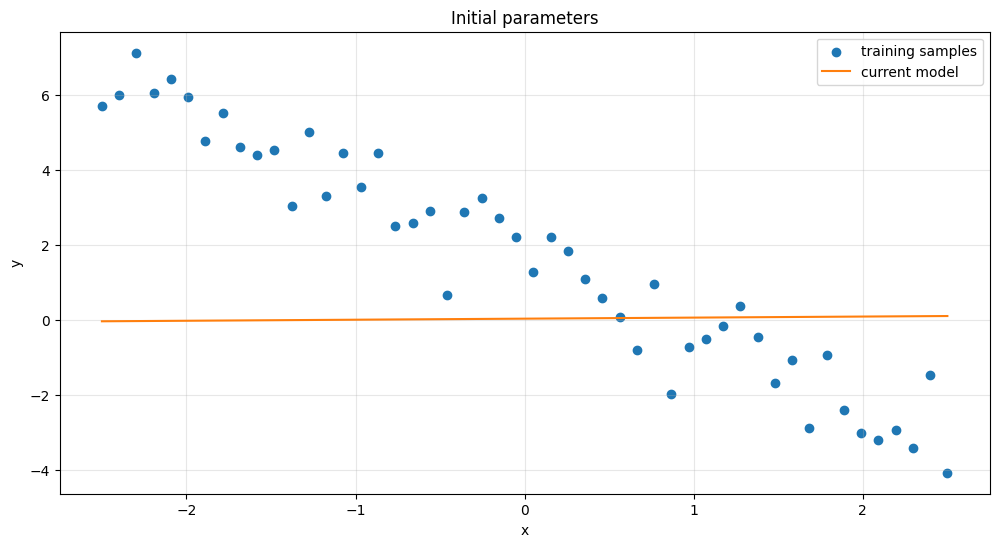

In [3]:

learning_rate = 0.05
w0 = float(rng.normal(loc=0.0, scale=1.0))
w1 = float(rng.normal(loc=0.0, scale=1.0))

iteration = 0
mse_history = []

predictions = linear_model(x_train, w0, w1)
current_mse = mean_squared_error(y_train, predictions)
mse_history.append(current_mse)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x_train, y_train, color='C0', label='training samples')
ax.plot(x_train, predictions, color='C1', label='current model')
ax.set_title('Initial parameters')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(alpha=0.3)

print(f'Initial w0 = {w0:.4f}, w1 = {w1:.4f}, MSE = {current_mse:.4f}')
plt.show()



## Take a single gradient-descent step

Execute the next cell repeatedly to watch $(w_0, w_1)$ evolve. Each run computes
$\nabla L$, updates both parameters, and plots the current model along with the MSE
history.


Iteration 9
w0 = 1.007870, w1 = -1.765890
Gradient = (-1.370658, 1.238244)
MSE = 1.110231


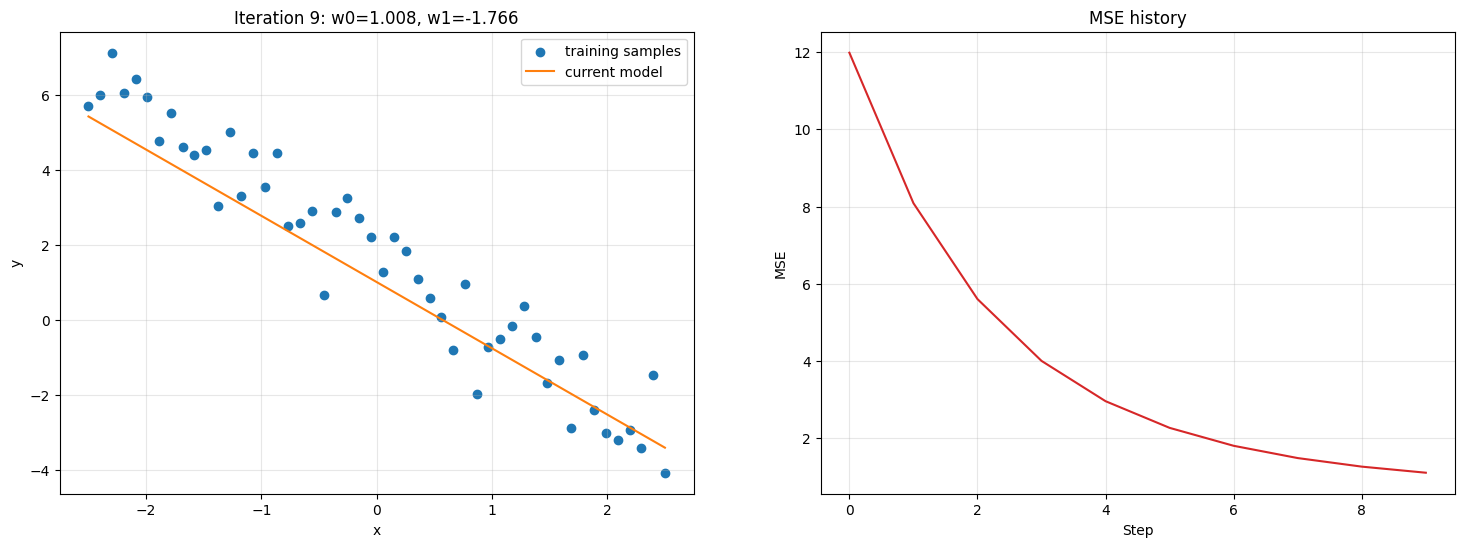

In [12]:

try:
    x_train
    y_train
    w0
    w1
    learning_rate
    iteration
    mse_history
except NameError as exc:
    raise RuntimeError('Please run the initialization cell first.') from exc

grad = mse_gradient(x_train, y_train, w0, w1)
w0 -= learning_rate * grad[0]
w1 -= learning_rate * grad[1]
iteration += 1

predictions = linear_model(x_train, w0, w1)
current_mse = mean_squared_error(y_train, predictions)
mse_history.append(current_mse)

fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(18, 6))

ax_left.scatter(x_train, y_train, color='C0', label='training samples')
ax_left.plot(x_train, predictions, color='C1', label='current model')
ax_left.set_title(f'Iteration {iteration}: w0={w0:.3f}, w1={w1:.3f}')
ax_left.set_xlabel('x')
ax_left.set_ylabel('y')
ax_left.legend()
ax_left.grid(alpha=0.3)

ax_right.plot(range(len(mse_history)), mse_history, color='C3')
ax_right.set_title('MSE history')
ax_right.set_xlabel('Step')
ax_right.set_ylabel('MSE')
ax_right.grid(alpha=0.3)

print(f'Iteration {iteration}')
print(f'w0 = {w0:.6f}, w1 = {w1:.6f}')
print(f'Gradient = ({grad[0]:.6f}, {grad[1]:.6f})')
print(f'MSE = {current_mse:.6f}')

plt.show()



## Run multiple steps automatically

Use the helper cell below to perform many updates at once. Adjust the number of
steps to see how quickly the parameters converge.


Completed 50 additional steps.
w0 = 1.621487, w1 = -1.989501
Latest MSE = 0.621380


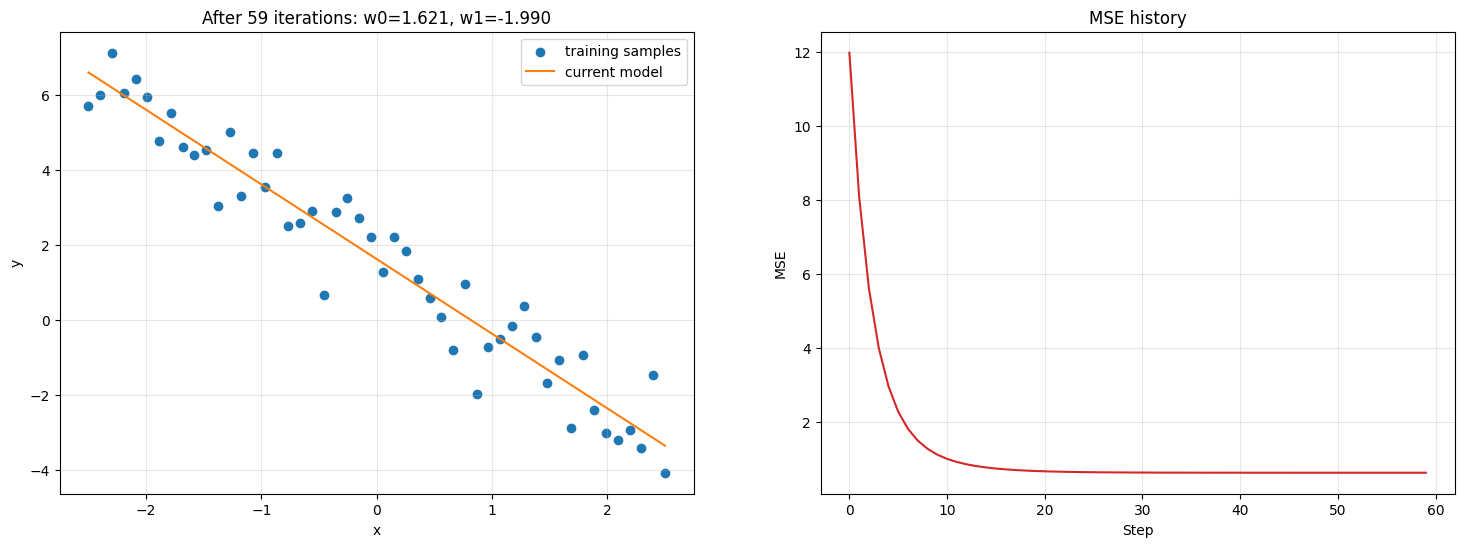

In [13]:

steps = 50

try:
    x_train
    y_train
    w0
    w1
    learning_rate
    iteration
    mse_history
except NameError as exc:
    raise RuntimeError('Please run the initialization cell first.') from exc

for _ in range(steps):
    grad = mse_gradient(x_train, y_train, w0, w1)
    w0 -= learning_rate * grad[0]
    w1 -= learning_rate * grad[1]
    iteration += 1
    predictions = linear_model(x_train, w0, w1)
    current_mse = mean_squared_error(y_train, predictions)
    mse_history.append(current_mse)

fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(18, 6))

ax_left.scatter(x_train, y_train, color='C0', label='training samples')
ax_left.plot(x_train, predictions, color='C1', label='current model')
ax_left.set_title(f'After {iteration} iterations: w0={w0:.3f}, w1={w1:.3f}')
ax_left.set_xlabel('x')
ax_left.set_ylabel('y')
ax_left.legend()
ax_left.grid(alpha=0.3)

ax_right.plot(range(len(mse_history)), mse_history, color='C3')
ax_right.set_title('MSE history')
ax_right.set_xlabel('Step')
ax_right.set_ylabel('MSE')
ax_right.grid(alpha=0.3)

print(f'Completed {steps} additional steps.')
print(f'w0 = {w0:.6f}, w1 = {w1:.6f}')
print(f'Latest MSE = {current_mse:.6f}')

plt.show()
